Chapter 4 Classification, q11

In [92]:
library(ISLR)
names(Auto)

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"      
[6] "acceleration" "year"         "origin"       "name"

# (a)

In [93]:
mpg_median = median(Auto$mpg)
mpg01 = rep(0,length(Auto$mpg))
mpg01[Auto$mpg>mpg_median]=1
new_auto = data.frame(Auto,mpg01)
names(new_auto)

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"      
 [6] "acceleration" "year"         "origin"       "name"         "mpg01"

# (b)

In [94]:
cor(new_auto[,-9])

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088,0.8369392
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316,-0.7591939
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351,-0.7534766
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715,-0.6670526
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054,-0.7577566
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458,0.3468215
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277,0.4299042
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000,0.5136984
mpg01,0.8369392,-0.7591939,-0.7534766,-0.6670526,-0.7577566,0.3468215,0.4299042,0.5136984,1.0000000


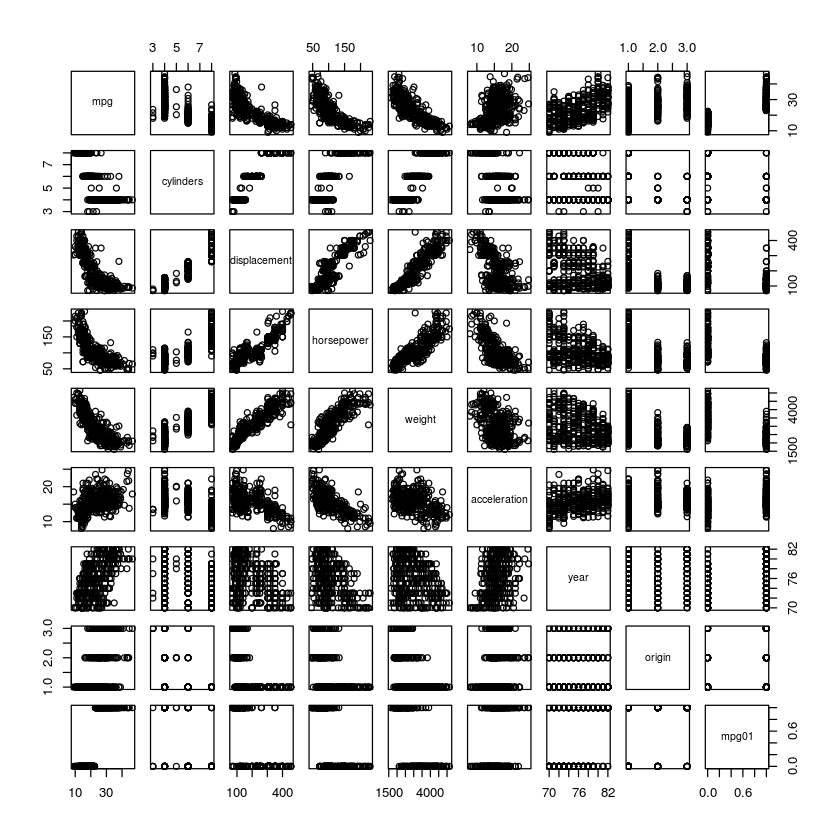

In [95]:
pairs(new_auto[,-9])

mpg01 has negative correlation with cylinders, displacement, horsepower and weight, and positive correlation with mpg and origin.

# (c)

In [96]:
nrow(new_auto)

[1] 392

In [97]:
new_auto = new_auto[sample(nrow(new_auto)),] #shuffle the data
training_data = new_auto[1:292,]
test_data = new_auto[293:nrow(new_auto),]
#removing the names column
training_data = training_data[,-9]
test_data = test_data[,-9]

# (d)

In [98]:
library(MASS)
lda.model = lda(mpg01~cylinders+displacement+horsepower+weight+origin,data=training_data)
lda.model

Call:
lda(mpg01 ~ cylinders + displacement + horsepower + weight + 
    origin, data = training_data)

Prior probabilities of groups:
        0         1 
0.4965753 0.5034247 

Group means:
  cylinders displacement horsepower   weight   origin
0  6.786207     274.6345  130.30345 3614.310 1.172414
1  4.170068     114.8946   78.59184 2332.361 1.993197

Coefficients of linear discriminants:
                       LD1
cylinders    -0.5238035189
displacement -0.0001961836
horsepower    0.0027577608
weight       -0.0008240104
origin        0.1968144053

In [99]:
lda.pred = predict(lda.model,newdata=test_data)
#test error percentage
mean(lda.pred$class!=test_data$mpg01)*100

[1] 11

# (e)

In [100]:
qda.model = qda(mpg01~cylinders+displacement+horsepower+weight+origin,data=training_data)
qda.model

Call:
qda(mpg01 ~ cylinders + displacement + horsepower + weight + 
    origin, data = training_data)

Prior probabilities of groups:
        0         1 
0.4965753 0.5034247 

Group means:
  cylinders displacement horsepower   weight   origin
0  6.786207     274.6345  130.30345 3614.310 1.172414
1  4.170068     114.8946   78.59184 2332.361 1.993197

In [101]:
qda.pred = predict(qda.model,newdata=test_data)
#test error percentage
mean(qda.pred$class!=test_data$mpg01)*100

[1] 11

# (f)

In [102]:
lgs.model = glm(mpg01~cylinders+displacement+horsepower+weight+origin,data=training_data,family=binomial)
summary(lgs.model)


Call:
glm(formula = mpg01 ~ cylinders + displacement + horsepower + 
    weight + origin, family = binomial, data = training_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5038  -0.1602   0.1305   0.3633   3.2674  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)  10.7646209  1.8730899   5.747 9.08e-09 ***
cylinders    -0.1848199  0.4013173  -0.461   0.6451    
displacement -0.0090657  0.0106002  -0.855   0.3924    
horsepower   -0.0315371  0.0159210  -1.981   0.0476 *  
weight       -0.0019700  0.0008278  -2.380   0.0173 *  
origin        0.1789998  0.3348042   0.535   0.5929    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 404.78  on 291  degrees of freedom
Residual deviance: 160.08  on 286  degrees of freedom
AIC: 172.08

Number of Fisher Scoring iterations: 7


In [103]:
lgs.probs = predict(lgs.model,newdata=test_data,type="response")
lgs.pred = rep(0,nrow(test_data))
lgs.pred[lgs.probs>0.5]=1
#test error percentage
mean(lgs.pred!=test_data$mpg01)*100

[1] 11

# (g)

In [104]:
library(class)
train.y = training_data$mpg01
test.y = test_data$mpg01
knn.pred = knn(training_data,test_data,train.y,k=1)
#test error rate wtih k =1
mean(knn.pred!=test.y)*100

[1] 13

In [105]:
knn.pred = knn(training_data,test_data,train.y,k=3)
#test error rate wtih k =3
mean(knn.pred!=test.y)*100

[1] 9

In [106]:
knn.pred = knn(training_data,test_data,train.y,k=5)
#test error rate wtih k =5
mean(knn.pred!=test.y)*100

[1] 10

In [107]:
knn.pred = knn(training_data,test_data,train.y,k=10)
#test error rate wtih k =10
mean(knn.pred!=test.y)*100

[1] 10

k=5 gives the lowest error rate